<a href="https://colab.research.google.com/github/Group08QA4U/doctor_helis/blob/main/doctor_helis_without_JSDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['animation.embed_limit'] = 2**128

In [3]:
class Plotable:
  def __init__(self):
    self.color = 'black'
    self.marker = '.'
    #self.label = 'object'
    return 

  def getColor(self):
    return self.color

  def getMarker(self):
    return self.marker

  def getLabel(self):
    return self.label



In [4]:

# 要救助者クラス
class Patient(Plotable):
  def __init__(self, x, y):
    super().__init__()
    self.color = 'black'
    self.marker = 'x'    
    self.label = 'patient'

    self.elapsed_time = 0
    self.x = np.random.randint(0, x)
    self.y = np.random.randint(0, y)
    #self.vehicles = []
    #self.clearing_vehicles = []
    # Triage (JTAS)
    # 1: Critical(Priority 1) Urgent 
    # 2: Serious (Priority 2) Can dalay up to 10 mins      
    # 3: Guarded (Priority 3) Can dalay up to 30 mins       
    # 4: Stable  (Priority 4) Can dalay up to 60 mins
    # 5: Dead                 No care needed

    #今回はトリアージは1,2のみを使用する
    self.triage = np.random.randint(1,3)

    # 救命のための応急処置までの時間(分)　remaining_time_to_first_aid
    # 救命のための現場治療までの時間(分)　remaining_time_to_doctor_treatment
    # 救命のための病院治療までの時間(分)　remaining_time_to_basehospital_treatment
    
    # トリアージに応じてランダムにしても良い。TODO
    if self.triage == 1:
      #self.remaining_time_to_first_aid = 10         
      self.remaining_time_to_doctor_treatment = max(np.random.normal(loc=20, scale=10.0, size=None),1.0)
      #self.remaining_time_to_basehospital_treatment = 40
    elif self.triage == 2:
      #self.remaining_time_to_first_aid = 20
      self.remaining_time_to_doctor_treatment = max(np.random.normal(loc=40, scale=10.0, size=None),1.0)
      #self.remaining_time_to_basehospital_treatment = 80
      
    else:
      print('ERROR: triage',self.triage,'is not suported')

  def update(self, time):
    self.elapsed_time += time

    #self.remaining_time_to_first_aid -= time
    self.remaining_time_to_doctor_treatment -= time
    #self.remaining_time_to_basehospital_treatment -= time


  def getPosition(self):
    return self.x, self.y

  def setPosition(self,x,y):
    self.x = x
    self.y = y
    return 

  def getRemainingTime(self):
    # 応急処置までの時間(分)、場治療までの時間(分)、病院治療までの時間(分)
    #return self.remaining_time_to_first_aid, self.remaining_time_to_doctor_treatment, self.remaining_time_to_basehospital_treatment
    return self.remaining_time_to_doctor_treatment

  def setVehicle(self, vehicle):
    return

  def clearVehicle(self, vehicle):
    return

  def canGoNextTarget(self):
    return True

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()    

  def hasPatient(self):
    return False  

In [5]:
## 施設ベースクラス
class Facility(Plotable):
  def __init__(self, x, y):
    super().__init__()
    self.x = x
    self.y = y
    self.vehicles = []
    self.clearing_vehicles = []
    self.patient = None 

  def getPosition(self):
    return self.x, self.y

  def update(self, time):
    for vehicle in self.clearing_vehicles:
      self.vehicles.remove(vehicle)    
    self.clearing_vehicles = []
    return

  def setVehicle(self, vehicle):
    if vehicle not in self.vehicles:
      self.vehicles.append(vehicle)

  def clearVehicle(self, vehicle):
    if vehicle not in self.clearing_vehicles:
      self.clearing_vehicles.append(vehicle)

  def canGoNextTarget(self):
    return True

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()

  def getOn(self, patient):
    self.patient = patient
    return

  def getOff(self):
    patient = self.patient
    self.patient = None
    return patient

  def hasPatient(self):
    return self.patient != None

  def getPosition(self):
    return self.x, self.y

# 基地病院クラス
class BaseHospital(Facility):
  def __init__(self, x, y):
    super().__init__(x, y)
    self.color = 'orange'
    self.marker = '*'   
    self.label = 'base hospital'   

  def getPosition(self):
    return self.x, self.y

  def update(self, time):
    return super().update(time)

  def setVehicle(self, vehicle):
    super().setVehicle(vehicle)

  def clearVehicle(self, vehicle):
    super().clearVehicle(vehicle)

  def canGoNextTarget(self):
    return super().canGoNextTarget()

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()        

  def getOn(self, patient):
    super().getOn(patient)

  def getOff(self):
    return super().getOff()

  def hasPatient(self):
    return super().hasPatient()


# 消防署クラス
class FireDepartment(Facility):
  def __init__(self,  x, y):
    super().__init__(x, y)
    self.color = 'yellow'
    self.marker = 's'   
    self.label = 'fire department'   

  def getPosition(self):
    return self.x, self.y

  def update(self, time):
    return super().update(time)

  def setVehicle(self, vehicle):
    super().setVehicle(vehicle)

  def clearVehicle(self, vehicle):
    super().clearVehicle(vehicle)

  def canGoNextTarget(self):
    return super().canGoNextTarget()

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()        

  def hasPatient(self):
    return super().hasPatient()

# ランデブーポイント
class RendezvousPoint(Facility):
  def __init__(self, x, y):
    super().__init__(x, y)
    self.color = 'gray'
    self.marker = 'H'   
    self.label = 'rendezvous point'   

    self.is_reserverd = False

  def getPosition(self):
    return super().getPosition()

  def update(self, time):
    return super().update(time)

  def setReserved(self, is_reserverd):
    self.is_reserverd = is_reserverd
    
  def setVehicle(self, vehicle):
    super().setVehicle(vehicle)

  def clearVehicle(self, vehicle):
    super().clearVehicle(vehicle)

  def canGoNextTarget(self):
    #return len(self.vehicles) >= 2
    return (len(self.vehicles) >= 2)

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()        

  def getOn(self, patient):
    super().getOn(patient)

  def getOff(self):
    return super().getOff()

  def hasPatient(self):
    return super().hasPatient()    

  #def setPosition(self):
  #  return 


In [6]:
# 乗り物ベースクラス
class Vehicle(Plotable):
  def __init__(self, x, y):
    super().__init__()
    self.target_x = self.init_x = self.x = x
    self.target_y = self.init_y = self.y = y
    self.patient = None 
    self.targets = []
    
  def update(self, t):
    # 速度計算
    if self.target_x != self.x:
      velocity_x = (self.velocity * (self.target_x - self.x))/ np.sqrt( (self.target_x - self.x) **2 + (self.target_y - self.y) **2 )
      if (self.target_x - self.x)**2 <= (t * (velocity_x*1000/60))**2:
        self.x = self.target_x
      else:
        self.x += (t * (velocity_x*1000/60))
    if self.target_y != self.y:
      velocity_y = (self.velocity * (self.target_y - self.y))/ np.sqrt( (self.target_x - self.x) **2 + (self.target_y - self.y) **2 )
      if (self.target_y - self.y)**2 <= (t * (velocity_y*1000/60))**2:
        self.y = self.target_y
      else:
        self.y += (t * (velocity_y*1000/60)) 

    # 搬送中の要救助者
    if self.patient != None:
      self.patient.setPosition(self.x, self.y)
    
    # 目的地に到着
    if self.x == self.target_x and self.y == self.target_y and self.x != self.init_x and self.y != self.init_y:

      if self.getLabel() == 'ambulance' and self.targets[0].getLabel() == 'patient':
        if self.hasPatient() != True:
          self.getOn(self.targets[0])

      if self.getLabel() == 'ambulance' and self.targets[0].getLabel() == 'rendezvous point':
        if self.hasPatient() == True :
          self.targets[0].getOn(self.getOff())

      if self.getLabel() == 'doctor heli' and self.targets[0].getLabel() == 'rendezvous point':
        if self.targets[0].hasPatient() != True:
          return 
        if self.hasPatient() != True:
          self.getOn(self.targets[0].getOff())


      if self.getLabel() == 'sdf heli' and self.targets[0].getLabel() == 'patient':
        if self.hasPatient() != True:
          self.getOn(self.targets[0])

      if self.targets[0].getLabel() == 'base hospital':
        if self.hasPatient() == True :
          self.targets[0].getOn(self.getOff())

      self.target_x, self.target_y = self.nextTarget()   


    return 
  def getPosition(self):
    return self.x, self.y
  def getVelocity(self):
    return self.velocity
    
  #def setTarget(self, x, y):
  #  #self.arrived = False
  #  self.target_x = x
  #  self.target_y = y
    

  def setTargets(self, targets):
    self.targets = []
    for target in targets:
      self.targets.append(target)
    self.target_x, self.target_y = self.targets[0].getPosition()

  def nextTarget(self):
    if len(self.targets) == 0:
      print('xxxx')
      return self.init_x, self.init_y

    self.targets.remove(self.targets[0])

    return self.targets[0].getPosition()

  def getTargetPos(self):
    return self.target_x, self.target_y

  def isBusy(self):
    return self.target_x != self.x or self.target_y != self.y

  def plot(self,ax):
    return

  def getOn(self, patient):
    self.patient = patient
    return

  def getOff(self):
    patient = self.patient
    self.patient = None
    return patient

  def setTargetInitPos(self):
    self.target_x = self.init_x
    self.target_y = self.init_y

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()    

  def hasPatient(self):
    return self.patient != None


#ドクターヘリ
class DrHeli(Vehicle):
  def __init__(self, x, y):
    super().__init__(x, y)
    self.color = 'blue'
    self.marker = '1'       
    self.label = 'doctor heli' 
    self.velocity = 200
    return
  def update(self, t):
    return super().update(t)

  def getPosition(self):
    return super().getPosition()    

  def getVelocity(self):
    return super().getVelocity()    

  def isBusy(self, x, y):
    return super().isBusy()

  def setTargetInitPos(self):
    super().setTargetInitPos()

  def getOn(self, patient):
    super().getOn(patient)

  def getOff(self):
    return super().getOff()

  def setTargets(self, objs):
    super().setTargets(objs)

  def nextTarget(self):
    return super().nextTarget()

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()    
    
  def hasPatient(self):
    return super().hasPatient()

#救急車
class Ambulance(Vehicle):
  def __init__(self, x, y):
    super().__init__(x, y)
    self.color = 'red'
    self.marker = '+'       
    self.label =  'ambulance'
    self.velocity = 60

  def update(self, t):
    return super().update(t)

  def getPosition(self):
    return super().getPosition()    

  def getVelocity(self):
    return super().getVelocity()      
      
  def getTarget(self):
    return super().getTarget()

  def isBusy(self, x, y):
    return super().isBusy()

  def setTargetInitPos(self):
    super().setTargetInitPos()

  def getOn(self, patient):
    super().getOn(patient)

  def getOff(self):
    return super().getOff()    

  def setTargets(self, objs):
    super().setTargets(objs)

  def nextTarget(self):
    return super().nextTarget()    

  def getColor(self):
    return super().getColor()

  def getMarker(self):
    return super().getMarker()

  def getLabel(self):
    return super().getLabel()   
    
  def hasPatient(self):
    return super().hasPatient()
         

In [7]:
import math
from numpy import linalg as LA
from matplotlib import animation, rc
from IPython.display import HTML

class World:
  def __init__(self, width, height, num_of_patients, num_of_rendezvous_points, num_of_basehospitals, num_of_fire_departments):

    #仮想地図の解像度（メートル）10km x 10km
    self.width = width
    self.height = height

    self.step = 0.0 # minuts
    self.time = 0

    self.num_of_patients = num_of_patients
    self.num_of_ambulances = self.num_of_fire_departments = num_of_fire_departments
    self.num_of_rendezvous_points = num_of_rendezvous_points
    self.num_of_doctor_helis = self.num_of_basehospitals = num_of_basehospitals
    #self.num_of_sdf_helis = self.num_of_sdf_bases = num_of_sdf_bases


    # 要救助者
    self.patients = []
    for _ in range(self.num_of_patients):
      self.patients.append(Patient(np.random.randint(0, self.width), np.random.randint(0, self.height)))

    # 消防署
    self.fire_departments = []
    for _ in range(self.num_of_fire_departments):
      self.fire_departments.append(FireDepartment(np.random.randint(0, self.width), np.random.randint(0, self.height)))

    # 救急車 
    self.ambulances = []
    for i in range(self.num_of_ambulances):
      x, y = self.fire_departments[i].getPosition()
      self.ambulances.append(Ambulance(x, y))      

    # ランデブーポイント
    self.rendezvous_points = []
    for _ in range(self.num_of_rendezvous_points):
      self.rendezvous_points.append(RendezvousPoint(np.random.randint(0, self.width), np.random.randint(0, self.height)))

    # 基地病院
    self.basehospitals = []
    for _ in range(self.num_of_basehospitals):
      self.basehospitals.append(BaseHospital(np.random.randint(0, self.width), np.random.randint(0, self.height)))

    # ドクターヘリ
    self.doctor_helis = []
    for i in range(self.num_of_doctor_helis):
      x, y = self.basehospitals[i].getPosition() 
      self.doctor_helis.append(DrHeli(x, y))

    self.calcDistance4AllEdges()

  def initPlot(self, ax, title):
    plt.close()
    self.ax = ax
    self.title = title

    self.charts = []

    # 基地病院
    if len(self.basehospitals) > 0:
      c = self.basehospitals[0].getColor()
      m = self.basehospitals[0].getMarker()
      l = self.basehospitals[0].getLabel()
      self.point_basehospitals = self.ax.scatter([], [], c=c, marker=m, label=l, s=200)    
      offset = []
      for basehospital in self.basehospitals:
        x, y = basehospital.getPosition()
        offset.append([x, y])
      self.charts.append(self.point_basehospitals)

    # 消防署
    if len(self.fire_departments) > 0:
      c = self.fire_departments[0].getColor()
      m = self.fire_departments[0].getMarker()
      l = self.fire_departments[0].getLabel()    
      self.point_fire_departments = self.ax.scatter([], [], c=c, marker=m, label=l, s=200)    
      offset = []
      for fire_department in self.fire_departments:
        x, y = fire_department.getPosition()
        offset.append([x, y])
      self.charts.append(self.point_fire_departments)

    # ランデブーポイント
    if len(self.rendezvous_points) > 0:
      c = self.rendezvous_points[0].getColor()
      m = self.rendezvous_points[0].getMarker()
      l = self.rendezvous_points[0].getLabel()       
      self.point_rendezvous_points = self.ax.scatter([], [], c=c, marker=m, label=l, s=200)    
      self.charts.append(self.point_rendezvous_points)
      offset = []
      for rendezvous_point in self.rendezvous_points:
        x, y = rendezvous_point.getPosition()
        offset.append([x, y])

    # 救急車
    if len(self.ambulances) > 0:
      c = self.ambulances[0].getColor()
      m = self.ambulances[0].getMarker()
      l = self.ambulances[0].getLabel()       
      self.route_ambulances = []
      self.point_ambulances = self.ax.scatter([], [], c=c, marker=m, label=l, s=200)   
      self.charts.append(self.point_ambulances)    
      for ambulance in self.ambulances:
        line, = self.ax.plot([], [], c=c, linestyle="dashed")
        self.route_ambulances.append(line)
        self.charts.append(line)    
  
    # ドクターヘリ
    if len(self.doctor_helis) > 0:
      c = self.doctor_helis[0].getColor()
      m = self.doctor_helis[0].getMarker()
      l = self.doctor_helis[0].getLabel()      
      self.route_doctor_helis = []
      self.point_doctor_helis = self.ax.scatter([], [], c=c, marker=m, label=l, s=200)   
      self.charts.append(self.point_doctor_helis)
      for doctor_heli in self.doctor_helis:
        line, = self.ax.plot([], [], c=c, linestyle="dashed")
        self.route_doctor_helis.append(line)
        self.charts.append(line)

    # 要救助者
    if len(self.patients) > 0:
      c = self.patients[0].getColor()
      m = self.patients[0].getMarker()
      l = self.patients[0].getLabel()  
      self.point_patients = self.ax.scatter([], [],  c=c, marker=m, label=l, s=100)   
      self.charts.append(self.point_patients)
      self.annotates = []
      for patient in self.patients:
        x, y = patient.getPosition()
        #first_aid, doctor_treatment, basehospital_treatment = patient.getRemainingTime()
        doctor_treatment = patient.getRemainingTime()
        fc='green'
        #if first_aid <= 5 or doctor_treatment <= 5 or basehospital_treatment <= 5:
        #  fc='yellow'
        #if first_aid <= 1 or doctor_treatment <= 1 or basehospital_treatment <= 0:
        #  fc='red'  
        #ano = self.ax.annotate("" ,xy=(patient.getPosition()[0], patient.getPosition()[1]), xytext=(-30, 30),textcoords='offset points', ha='left', va='top',bbox=dict(boxstyle='round,pad=0.5', fc=fc, alpha=0.3),arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0'))
        #ano = self.ax.annotate("" ,xy=(x, y), xytext=(-30, 30), textcoords='offset points', ha='left', va='top',bbox=dict(boxstyle='round,pad=0.5', fc=fc, alpha=0.3), arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0'))
        #self.annotates.append(ano)
        #self.charts.append(ano)
    
    # 凡例のスペースを空ける
    self.ax.set_xlim(0,self.width)
    self.ax.set_ylim(0,int(self.height*1.25))
    self.ax.legend(loc='upper center', ncol=3)
    self.ax.set_title(self.title)

    return tuple(self.charts)
    #return self.charts

  def plot(self):
    plt.close()

    # 基地病院
    if len(self.basehospitals):
      offset = []
      for basehospital in self.basehospitals:
        x, y = basehospital.getPosition()
        offset.append([x, y])
      self.point_basehospitals.set_offsets(offset)

    # 消防署
    if len(self.fire_departments):
      offset = []
      for fire_department in self.fire_departments:
        x, y = fire_department.getPosition()
        offset.append([x, y])
      self.point_fire_departments.set_offsets(offset)

    # ランデブーポイント
    if len(self.rendezvous_points):
      offset = []
      for rendezvous_point in self.rendezvous_points:
        x, y = rendezvous_point.getPosition()
        offset.append([x, y])
      self.point_rendezvous_points.set_offsets(offset)

    # 救急車
    if len(self.ambulances):
      offset = []
      for i, ambulance in enumerate(self.ambulances):
        x, y = ambulance.getPosition()
        offset.append([x, y])
        target_x, target_y = ambulance.getTargetPos()
        self.route_ambulances[i].set_data([x, target_x], [y, target_y])
      self.point_ambulances.set_offsets(offset)

    # ドクターヘリ
    if len(self.doctor_helis):
      offset = []
      for i, doctor_heli in enumerate(self.doctor_helis):
        x, y = doctor_heli.getPosition()
        offset.append([x, y])
        target_x, target_y = doctor_heli.getTargetPos()
        self.route_doctor_helis[i].set_data([x, target_x], [y, target_y])
      self.point_doctor_helis.set_offsets(offset)

    # 要救助者
    if len(self.patients):
      offset = []
      for i, patient in enumerate(self.patients):
        x, y = patient.getPosition()
        offset.append([x, y])
        doctor_treatment = patient.getRemainingTime()
        fc='green'
        #if first_aid <= 5 or doctor_treatment <= 5 or basehospital_treatment <= 5:
        #  fc='yellow'
        #if first_aid <= 1 or doctor_treatment <= 1 or basehospital_treatment <= 0:
        #  fc='red'  
        #self.annotates[i].set_position((x,y))
        #self.annotates[i].xy = (-30, 30)
        #self.annotates[i].set_text(str(int(first_aid)) + ', ' + str(int(doctor_treatment)) + ', ' + str(int(basehospital_treatment)))
        #self.annotates[i].set
        #self.charts.append(self.ax.annotate(str(int(first_aid)) + ', ' + str(int(doctor_treatment)) + ', ' + str(int(basehospital_treatment)) ,xy=(patient.getPosition()[0], patient.getPosition()[1]), xytext=(-30, 30),textcoords='offset points', ha='left', va='top',bbox=dict(boxstyle='round,pad=0.5', fc=fc, alpha=0.3),arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0')))
      
      self.point_patients.set_offsets(offset)

    return tuple(self.charts)
    #return self.charts


  def distance(self, x1, y1, x2, y2):
      d = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
      return d

  def calcDistance4AllEdges(self):

    # ドクターヘリ速度（時速）
    if len(self.doctor_helis):    
      velocity_doctor_heli = self.doctor_helis[0].getVelocity()

    # 救急車（時速）
    if len(self.ambulances):
      velocity_ambulance = self.ambulances[0].getVelocity()

    # 救急車から要救助者への全ルートの距離を計算
    self.dist_a2p = np.zeros((self.num_of_ambulances, self.num_of_patients))
    self.time_a2p = np.zeros((self.num_of_ambulances, self.num_of_patients))
    for i, ambulance in enumerate(self.ambulances):
      x1 = ambulance.getPosition()[0]
      y1 = ambulance.getPosition()[1]
      for j, patient in enumerate(self.patients):
        x2 = patient.getPosition()[0]
        y2 = patient.getPosition()[1]
        self.dist_a2p[i][j] = self.distance(x1, y1, x2, y2)
        self.time_a2p[i][j] = (self.distance(x1, y1, x2, y2)*60)/(velocity_ambulance * 1000)

    # 要救助者 to ランデブーポイント
    self.dist_p2r = np.zeros((self.num_of_patients, self.num_of_rendezvous_points))
    self.time_p2r = np.zeros((self.num_of_patients, self.num_of_rendezvous_points))

    for i, patient in enumerate(self.patients):
      x1 = patient.getPosition()[0]
      y1 = patient.getPosition()[1]
      # 要救助者からランデブーポイントへの全ルートの距離を計算
      if len(self.rendezvous_points) and len(self.ambulances):
        for j, rendezvous_point in enumerate(self.rendezvous_points):
          x2 = rendezvous_point.getPosition()[0]
          y2 = rendezvous_point.getPosition()[1]
          self.dist_p2r[i][j] = self.distance(x1, y1, x2, y2)
          self.time_p2r[i][j] = (self.distance(x1, y1, x2, y2)*60)/(velocity_ambulance * 1000)

    # ランデブーポイント to ドクターヘリ
    self.dist_r2d = np.zeros((self.num_of_rendezvous_points, self.num_of_doctor_helis))
    self.time_r2d = np.zeros((self.num_of_rendezvous_points, self.num_of_doctor_helis))
    # ランデブーポイント to 基地病院
    self.dist_r2h = np.zeros((self.num_of_rendezvous_points, self.num_of_basehospitals))
    self.time_r2h = np.zeros((self.num_of_rendezvous_points, self.num_of_basehospitals))
    if len(self.rendezvous_points):    
      for i, rendezvous_point in enumerate(self.rendezvous_points):
        x1 = rendezvous_point.getPosition()[0]
        y1 = rendezvous_point.getPosition()[1]
        # ランデブーポイントからドクターヘリへの全ルートの距離を計算
        if len(self.doctor_helis):    
          for j, doctor_heli in enumerate(self.doctor_helis):
            x2 = doctor_heli.getPosition()[0]
            y2 = doctor_heli.getPosition()[1]
            self.dist_r2d[i][j] = self.distance(x1, y1, x2, y2)
            self.time_r2d[i][j] = (self.distance(x1, y1, x2, y2)*60)/(velocity_doctor_heli * 1000)
        # ランデブーポイントから基地病院への全ルートの距離を計算
        if len(self.basehospitals):           
          for k, basehospital in enumerate(self.basehospitals):
            x2 = basehospital.getPosition()[0]
            y2 = basehospital.getPosition()[1]
            self.dist_r2h[i][k] = self.distance(x1, y1, x2, y2)
            self.time_r2h[i][k] = (self.distance(x1, y1, x2, y2)*60)/(velocity_doctor_heli * 1000)

  def getEstimatedTimes4AllEdgesInMinutes(self):
    # time_a2p : 救急車から要救助者
    # time_p2r : 要救助者からランデブーポイント
    # time_s2p : 自衛隊ヘリから要救助者
    # time_r2h : ランデブーポイントから基地病院
    return self.time_a2p, self.time_p2r, self.time_r2d, self.time_r2h

  def getRemainingTime4AllPatients(self):
    remaining_time_patients = [] 
    for patient in self.patients:
      remaining_time_patients.append(patient.getRemainingTime())
    return remaining_time_patients


  # 時間変化に伴う要救助者に残された時間やヘリ等の位置を変化
  def update(self, i):

    # 救急車
    for i, ambulance in enumerate(self.ambulances):
      ambulance.update(self.step)

    # 要救助者
    for patient in self.patients:
      patient.update(self.step)

    # ランデブーポイント
    for rendezvous_point in self.rendezvous_points:
      rendezvous_point.update(self.step)

    # ドクターヘリ
    for i, doctor_heli in enumerate(self.doctor_helis):
      doctor_heli.update(self.step)

    # 基地病院
    for basehospital in self.basehospitals:
      basehospital.update(self.step)

    
    self.step = 0.1
    self.time += self.step
    return self.plot()

  def despatch(self, optimizer):
    time_a2p, time_p2r, time_r2d, time_r2h = self.getEstimatedTimes4AllEdgesInMinutes()
    remaining_time_all_patients = self.getRemainingTime4AllPatients()
    
    best_routes = optimizer.getCandidateRoutes(time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)

    print('[patient#, [a2p, p2r, r2d, d2h], Time left for the patient, Estimated time to start treatment, Score(Difference b/w the time left for the patient and the time to start treatment)]')
    total_score = 0
    for route in best_routes:
      if route[1][0] == -1 or route[1][1] == -1 or route[1][2] == -1 or route[1][3] == -1:
        total_score = None
        break      
      total_score += route[4]
      print(route)
    print('Total score:',total_score)

    self.current_routes = best_routes
    # [patient#, [a2p, p2r, r2d, d2h], Time left for the patient, Estimated time to start treatment, Score(Difference b/w the time left for the patient and the time to start treatment)]
    for p, resources, _, _, _ in self.current_routes:
      if resources[1] != -1 and resources[0] != -1:
        self.ambulances[resources[0]].setTargets([self.patients[p], self.rendezvous_points[resources[1]], self.fire_departments[resources[0]]])

      if resources[2] != -1 and resources[1] != -1:        
        self.doctor_helis[resources[2]].setTargets([self.rendezvous_points[resources[1]], self.basehospitals[resources[2]]])

      if resources[1] != -1:
        self.rendezvous_points[resources[1]].setReserved(True)

  def getTotalScore(self, optimizer):
    time_a2p, time_p2r, time_r2d, time_r2h = self.getEstimatedTimes4AllEdgesInMinutes()
    remaining_time_all_patients = self.getRemainingTime4AllPatients()

    best_routes = optimizer.getCandidateRoutes(time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)

    total_score = 0
    for route in best_routes:
      if route[1][0] == -1 or route[1][1] == -1 or route[1][2] == -1 or route[1][3] == -1:
        total_score = None
        break      
      total_score += route[4]
      #print(route)
    #print('Total score:',total_score)    
    return total_score

  def addPatients(self, num_of_patients):
    self.num_of_patients += num_of_patients
    for _ in range(num_of_patients):
      self.patients.append(Patient(self.width, self.height))




In [8]:
class Animation:
  def __init__(self, classic, qa, frame=800):
    self.classic = classic
    self.qa = qa
    self.fig = plt.figure(figsize=(22, 10))

    grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
    self.ax1 = plt.subplot(grid[0, 0])
    self.ax2 = plt.subplot(grid[0, 1])
    self.frame = frame


  def initPlot(self):
    return self.classic.initPlot(self.ax1,'Cassic') + self.qa.initPlot(self.ax2,'Quantum annealing')

  def update(self, i):
    return self.classic.update(i) + self.qa.update(i)

  def animate(self):
    anim = animation.FuncAnimation(self.fig, self.update, init_func=self.initPlot, frames=self.frame, interval=100, blit=True)
    rc('animation', html='jshtml')
    return anim



In [9]:
import sys
# 最適化ベースクラス
class Optimizer:
  def __init__(self):
    return

  def getCandidateRoutes(self, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients, is_debug=False):

    self.num_of_patients = time_a2p.shape[1]
    self.num_of_ambulances = time_a2p.shape[0]
    self.num_of_rendezvous_points = time_p2r.shape[1]
    self.num_of_doctor_helis = time_r2d.shape[1]
    #self.num_of_sdf_helis = time_s2p.shape[1]
    self.num_of_basehospitals = time_r2h.shape[1]

    self.time_a2p = time_a2p
    self.time_p2r = time_p2r
    #self.time_s2p = time_s2p
    #self.time_p2h = time_p2h
    self.time_r2d = time_r2d
    self.time_r2h = time_r2h

    self.remaining_time_all_patients = remaining_time_all_patients
    
    if is_debug:
      print('num of patients',self.num_of_patients)
      print('num of ambulances',self.num_of_ambulances)
      print('num of rendezvous_points',self.num_of_rendezvous_points)
      print('num of doctor_helis',self.num_of_doctor_helis)
      print('num of basehospitals',self.num_of_basehospitals)
          
      print('Estimate time from ambulance to patient (ambulance x patient)\n',self.time_a2p)
      print('Estimate time from patient to rendezvous_point (patient x rendezvous_point)\n',self.time_p2r)
      print('Estimate time from rendezvous_point to doctor heli (rendezvous_point x doctor heli)\n',self.time_r2d)
      print('Estimate time from rendezvous_point to basehospital (rendezvous_point x basehospital)\n',self.time_r2h)    

      print('remaining time for all patients [(FirstAid, Treatement, Tobasehospital),]\n',remaining_time_all_patients)


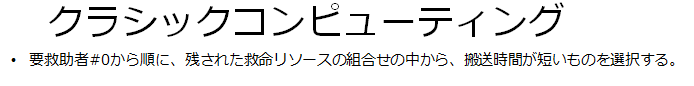

In [10]:
class Classic(Optimizer):
  def __init__(self):
    super().__init__()

  def getCandidateRoutes(self, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients):
    super().getCandidateRoutes(time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)
    
    candidate_routes = np.zeros((self.num_of_patients, self.num_of_ambulances * self.num_of_rendezvous_points * self.num_of_doctor_helis * self.num_of_basehospitals ))
    reserved_ambulances = np.zeros(self.num_of_ambulances)
    reserved_rendezvous_points = np.zeros(self.num_of_rendezvous_points)
    reserved_doctor_helis = np.zeros(self.num_of_doctor_helis)
    #reserved_sdf_helis = np.zeros(self.num_of_sdf_helis)
    reserved_basehospitals = np.zeros(self.num_of_basehospitals)
    
    best_routes = []
    for i in range(self.num_of_patients):
      best_routes.append([i, [-1, -1, -1, -1 ], remaining_time_all_patients[i], -1, -remaining_time_all_patients[i]])
      #min_route1 = min_time_to_treatment_1 = min_time_to_treatment_2 = sys.maxsize
      min_time_to_treatment_1 = min_time_to_treatment_2 = sys.maxsize
      a2p = p2r = r2d = d2h = -1      
      #s2p = p2h = -1   
      for j in range(self.num_of_ambulances):
        if reserved_ambulances[j] == True:
          continue 
        for k in range(self.num_of_rendezvous_points):
          if reserved_rendezvous_points[k] == True:
            continue           
          for l in range(self.num_of_doctor_helis):
            if reserved_doctor_helis[l] == True:
              continue 

            time_to_treatment = max( time_a2p[j][i] + time_p2r[i][k] , time_r2d[k][l] )
            if min_time_to_treatment_1 > time_to_treatment:
              min_time_to_treatment_1 = time_to_treatment
              a2p = j
              p2r = k
              r2d = l
              d2h = l # ドクターヘリは、出動した基地病院へ戻る

            #for m in range(self.num_of_basehospitals):
            #  #route_estimated_time = max( time_a2p[j][i] + time_p2r[i][k] , time_r2d[k][l] ) + time_r2h[k][m]
            #  time_to_treatment = max( time_a2p[j][i] + time_p2r[i][k] , time_r2d[k][l] )
            #  #print(i,j,k,l,m,-1,-1,route_estimated_time)
            #  if min_time_to_treatment_1 > time_to_treatment:
            #    min_time_to_treatment_1 = time_to_treatment
            #    #min_route1 = route_estimated_time
            #    a2p = j
            #    p2r = k
            #    r2d = l
            #    d2h = m



      if min_time_to_treatment_1 < min_time_to_treatment_2:
        reserved_ambulances[a2p] = True
        reserved_rendezvous_points[p2r] = True
        reserved_doctor_helis[r2d] = True
        #[patient#, [a2p, p2r, r2d, d2h], Time left for the patient, Estimated time to start treatment, Score(Difference b/w the time left for the patient and the time to start treatment)]
        best_routes[i] = [i, [a2p, p2r, r2d, d2h ], remaining_time_all_patients[i], min_time_to_treatment_1, remaining_time_all_patients[i] - min_time_to_treatment_1]
        #best_routes.append([i, [a2p, p2r, r2d, d2h ], remaining_time_all_patients[i], min_time_to_treatment_1, remaining_time_all_patients[i] - min_time_to_treatment_1])




    return best_routes    

# 線形計画法(0-1整数計画法)

## 目的関数 (Objective)

$$ \min \left( \sum_i^A \sum_j^N \sum_k^R \sum_l^D x^{a}_{ij}  x^r_{jk} x^d_{kl} max(T^{a2p}_{ij} +   T^{p2r}_{jk} ,   T^{r2d}_{kl}) \right)$$

- $ x^a_{ij} $ :救急車→患者
- $ x^r_{jk} $ :患者→ランデブーポイント
- $ x^d_{kl} $ :ランデブーポイント→ドクターヘリ
- $ T^{a2p}_{ij} $ :救急車→患者までの時間
- $ T^{p2r}_{jk} $ :患者→ランデブーポイントまでの時間
- $ T^{r2d}_{kl} $ :ランデブーポイント→ドクターヘリの時間

ランデブーポイントから、ドクターヘリは出発地の基地病院に帰還することとする。

## 制約条件 (Subject to)

前提条件：
- 患者数Nとする
- 救急車、総数Aとした時$(A \geq N)$とする
- ランデブーポイント、総数Rとした時$(R \geq N)$とする
- ドクターヘリ、総数Dとした時$(D \geq N)$とする


### 救急車に関する制約
1人の患者に1台割り当て
1台の救急車に1人以下の患者割り当て
$$ \sum_j^N x^a_{ij} \leq 1　　\forall i \in A $$

1人の患者に1台割り当て
$$ \sum_i^A x^a_{ij} = 1　　\forall j \in N $$

### ランデブーポイントに関する制約
1人の患者に1箇所割り当て
$$ \sum_k^R x^r_{jk} = 1　　\forall j \in N $$

1箇所のランデブーポイントに1人以下の患者割り当て
$$ \sum_j^N x^r_{jk} \leq 1　　\forall k \in R $$

<!--
ランデブーポイントの割り当ての合計は患者数N
$$ \sum_j^N \sum_k^R x^r_{jk} = N $$
-->

### ドクターヘリに関する制約
1つのランデブーポイントに1機以下割り当て
$$ \sum_l^D x^d_{kl} \leq 1　　\forall k \in R $$

1機のドクターヘリに1人以下割り当て
$$ \sum_k^R x^d_{kl} \leq 1　　\forall l \in D $$

<!--
ドクターヘリの割り当ての合計は患者数N
$$ \sum_k^R \sum_l^D x^d_{kl} = N $$
-->

### 非線形関数への対応
目的関数に非線形関数が含まれるが、$x^a_{ij}  x^r_{jk} x^d_{kl}$がそれぞれバイナリ変数であるため、線形化が可能である。

ここで、新しいバイナリ変数$y_{ijkl}$を導入する。

$$ y_{ijkl} $$は下記を表現することを目的とする。
$$ y_{ijkl} = x^a_{ij}  x^r_{jk} x^d_{kl} $$

これは、以下の制約条件で表現できる。

$$ 2 - (x^a_{ij} + x^r_{jk} + x^d_{kl}) + y_{ijkl} \geq 0 $$

$$ x^a_{ij} - y_{ijkl} \geq 0 $$

$$ x^r_{jk} - y_{ijkl} \geq 0 $$

$$ x^d_{kl} - y_{ijkl} \geq 0 $$

$$ x^a_{ij}, x^r_{jk}, x^d_{kl}, y_{ijkl} = \{ 0 , 1\} $$

N人の患者の経路を用意するため、下記の制約を追加する。

$$ \sum_i \sum_j \sum_k \sum_l y_{ijkl} = N $$


これにより、目的関数は$y_{ijkl}$により下記で表現でき、線形関数として扱える。

$$ \min \left( \sum_i^A \sum_j^N \sum_k^R \sum_l^D y_{ijkl} max(T^{a2p}_{ij} +   T^{p2r}_{jk} ,   T^{r2d}_{kl}) \right)$$

In [11]:
!pip install pulp


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [21]:
import pulp
import itertools

class LP(Optimizer):
    def __init__(self):
        super().__init__()

    def getCandidateRoutes(self, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients):
        super().getCandidateRoutes(time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)
    
        candidate_routes = np.zeros((self.num_of_patients, self.num_of_ambulances * self.num_of_rendezvous_points * self.num_of_doctor_helis * self.num_of_basehospitals ))
        reserved_ambulances = np.zeros(self.num_of_ambulances)
        reserved_rendezvous_points = np.zeros(self.num_of_rendezvous_points)
        reserved_doctor_helis = np.zeros(self.num_of_doctor_helis)
        reserved_basehospitals = np.zeros(self.num_of_basehospitals)
        
        # 定数読み込み
        N = self.num_of_patients
        A = self.num_of_ambulances
        R = self.num_of_rendezvous_points
        D = self.num_of_doctor_helis
        B = self.num_of_basehospitals
        M = A + R + D + B
        
        # 変数のアドレスリスト作成
        pr = list( itertools.product(range(A),range(N),range(R),range(D)) )  # 全体
        pra = list( itertools.product(range(A),range(N)) )
        prr = list( itertools.product(range(N),range(R)) )
        prd = list( itertools.product(range(R),range(D)) )
        
        # 決定変数定義
        xa = {(i,j):pulp.LpVariable('xa%d_%d'%(i,j), cat="Binary") for i,j in pra}    # 救急車
        xr = {(j,k):pulp.LpVariable('xr%d_%d'%(j,k), cat="Binary") for j,k in prr}    # ランデブーポイント
        xd = {(k,l):pulp.LpVariable('xd%d_%d'%(k,l), cat="Binary") for k,l in prd}    # ドクターヘリ
        
        # 非線形関数の線形化用バイナリ変数定義
        y = {(i,j,k,l):pulp.LpVariable('y%d_%d_%d_%d'%(i,j,k,l), cat="Binary") for i,j,k,l in pr}
        
        # 最適化モデルの定義
        mip_model = pulp.LpProblem(sense=pulp.LpMinimize)
        
        # Objective function -> minimize(搬送時間) 
        objective =  pulp.lpSum(y[i,j,k,l] * max(time_a2p[i][j] + time_p2r[j][k], time_r2d[k][l]) for i,j,k,l in pr)

        mip_model += objective
        
        # Constraint functions
        ## Ambulance -> Patients
        for i in range(A):
            mip_model += pulp.lpSum(xa[i,j] for j in range(N)) <= 1
        for j in range(N):
            mip_model += pulp.lpSum(xa[i,j] for i in range(A)) == 1
        
        ## Patient -> Randezvous points
        for j in range(N):
            mip_model += pulp.lpSum(xr[j,k] for k in range(R)) == 1
        for k in range(R):
            mip_model += pulp.lpSum(xr[j,k] for j in range(N)) <= 1
            
        #mip_model += pulp.lpSum(xr[j,k] for j in range(N) for k in range(R)) == N
            
        ## Randezvous points -> Doctor helis
        for k in range(R):
            mip_model += pulp.lpSum(xd[k,l] for l in range(D)) <= 1
        for l in range(D):
            mip_model += pulp.lpSum(xd[k,l] for k in range(R)) <= 1
            
        #mip_model += pulp.lpSum(xd[k,l] for k in range(R) for l in range(D)) == N
        
        ## 非線形関数→線形関数のための制約条件
        for i in range(A):
            for j in range(N):
                for k in range(R):
                    for l in range(D):
                        mip_model += 2 - (xa[i,j] + xr[j,k] + xd[k,l]) + y[i,j,k,l] >= 0
                        mip_model += xa[i,j] - y[i,j,k,l] >= 0
                        mip_model += xr[j,k] - y[i,j,k,l] >= 0
                        mip_model += xd[k,l] - y[i,j,k,l] >= 0

        for j in range(N):
            mip_model += pulp.lpSum(y[i,j,k,l] for i in range(A) for k in range(R) for l in range(D)) == 1
        
        
        # ソルバー設定
        #solver = pulp.PULP_CBC_CMD(threads=10, timeLimit=600)    # 4 thread 並列指定
        solver = pulp.GUROBI_CMD()
        
        print("start pulp solver :{}".format(solver))
        
        # ソルバー起動
        mip_model.solve(solver)
        
        # 実行可能解が存在したかを表示
        print(pulp.LpStatus[mip_model.status])

        # 目的関数の計算値
        print(pulp.value(mip_model.objective))
        
        print("Ambulance -> Patients")
        for i,x in xa.items():
            if pulp.value(x) > 0:
                print(i)
                
        print("Patient -> Rendezvous points")
        for i,x in xr.items():
            if pulp.value(x) > 0:
                print(i)
        
        print("Rendezvous point -> Doctor helis")
        for i,x in xd.items():
            if pulp.value(x) > 0:
                print(i)
        
        
        print("routes")
        
        # 結果の格納
        best_routes = []
        ans_num = 0
        for i,x_a2p in xa.items():
            if pulp.value(x_a2p) > 0:
                best_routes.append([i[1], [-1, -1, -1, -1 ], remaining_time_all_patients[i[1]], -1, -remaining_time_all_patients[i[1]]])
                a2p = i[0]
                for j,x_p2r in xr.items():
                    if pulp.value(x_p2r) > 0:
                        if j[0] == i[1]:
                            p2r = j[1]
                            for k,x_r2d in xd.items():
                                if pulp.value(x_r2d) > 0:
                                    if k[0] == p2r:
                                        r2d = k[1]
                                        d2h = k[1] # ドクターヘリは、出動した基地病院へ戻る
                                        reserved_ambulances[a2p] = True
                                        reserved_rendezvous_points[p2r] = True
                                        reserved_doctor_helis[r2d] = True
                                        time_to_treatment = max( time_a2p[i[0]][i[1]] + time_p2r[j[0]][j[1]] , time_r2d[k[0]][k[1]] )
                                        print(i[0])
                                        best_routes[ans_num] = [i[1], [a2p, p2r, r2d, d2h ], remaining_time_all_patients[i[1]], time_to_treatment, remaining_time_all_patients[i[1]] - time_to_treatment]
                                        print(best_routes[ans_num])
                ans_num += 1
                                        
        return best_routes

In [13]:
!pip install openjij
!pip install dwave-ocean-sdk 


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [14]:
from dwave.system import DWaveSampler, EmbeddingComposite, LeapHybridSampler
from openjij import SQASampler

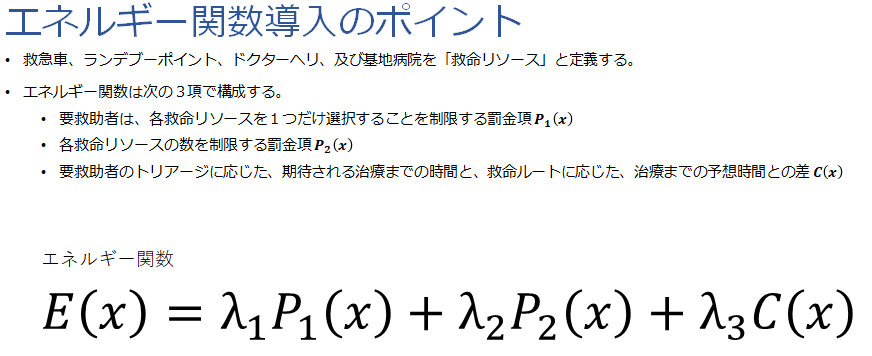

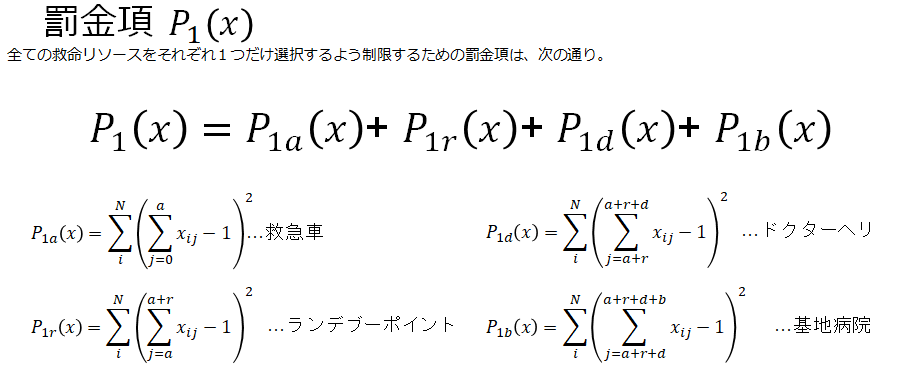

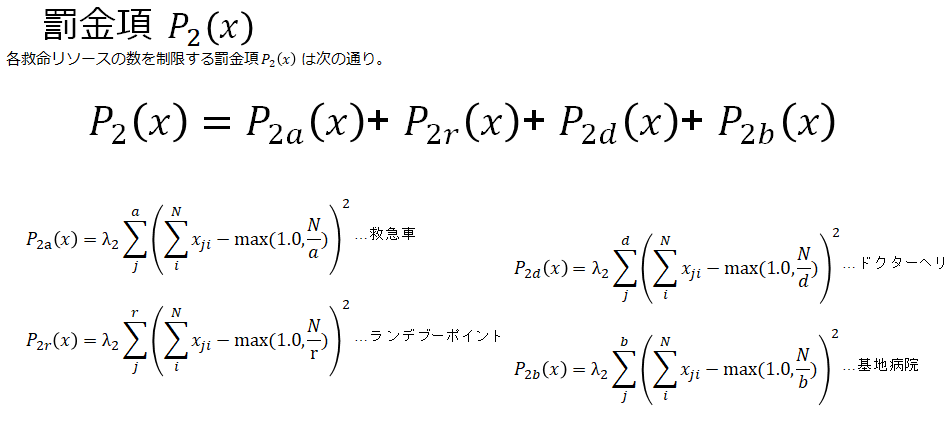

最終版のエネルギー関数の整理


## 罰金項$Q_0(x)$

\begin{equation}
Q_{0a}(x) = \lambda_0 \sum_i^N \left( \sum_{j}^{a} x_{ij} - \min(N,a,r,d) \right)^2 \\
Q_{0r}(x) = \lambda_0 \sum_i^N \left( \sum_{j=a}^{a+r} x_{ij} - \min(N,a,r,d) \right)^2 \\
Q_{0d}(x) = \lambda_0 \sum_i^N \left( \sum_{j=a+r}^{a+r+d} x_{ij} - \min(N,a,r,d) \right)^2 \\
\end{equation}

## 罰金項$Q_1(x)$

\begin{equation}
Q_{1a}(x) = \lambda_1 \sum_i^N \left( \sum_{j}^{a} x_{ij} - \frac{\min(N,a,r,d)}{a} \right)^2 \\
Q_{1r}(x) = \lambda_1 \sum_i^N \left( \sum_{j=a}^{a+r} x_{ij} - \frac{\min(N,a,r,d)}{r} \right)^2 \\
Q_{1d}(x) = \lambda_1 \sum_i^N \left( \sum_{j=a+r}^{a+r+d} x_{ij} - \frac{\min(N,a,r,d)}{d} \right)^2 \\
%% Q_{1b}(x) = \lambda_1 \sum_i^N \left( \sum_{j=a+r+d}^{a+r+d+b} x_{ij} - \frac{\min(N,a,r,d)}{b} \right)^2 \\ %%
\end{equation}

## 罰金項$Q_2(x)$

\begin{equation}
Q_{2a}(x) = \lambda_2 \sum_{j}^{a} \left( \sum_i^N x_{ij} - \frac{\min(N,a,r,d)}{a} \right)^2 \\
Q_{2r}(x) = \lambda_2 \sum_{j=a}^{a+r} \left( \sum_i^N x_{ij} - \frac{\min(N,a,r,d)}{r} \right)^2 \\
Q_{2d}(x) = \lambda_2 \sum_{j=a+r}^{a+r+d} \left( \sum_i^N x_{ij} - \frac{\min(N,a,r,d)}{d} \right)^2 \\
\end{equation}

## コスト項$C(x)$

\begin{equation}
C(x) = \lambda_3 \left( T^{rp}_i - \max ( T^{a2p2r}_{ikl}, T^{r2d}_{jl}) \right)
\end{equation}


In [15]:
class QA(Optimizer):
  def __init__(self, use_d_wave = False, use_hybrid = True, is_debug = False, is_new_algorithm_p1 = False, is_new_algorithm_p2 = False):
    super().__init__()
    self.token = '************************' 
    self.endpoint = 'https://cloud.dwavesys.com/sapi/'
    self.DEBUG = is_debug
    self.use_d_wave = use_d_wave
    self.use_hybrid = use_hybrid
    self.is_new_algorithm_p1 = is_new_algorithm_p1
    self.is_new_algorithm_p2 = is_new_algorithm_p2

  def getCandidateRoutes(self, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients):
    super().getCandidateRoutes(time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)
    num_route = self.num_of_ambulances * self.num_of_rendezvous_points * self.num_of_doctor_helis * self.num_of_basehospitals
    #N = self.num_of_patients * num_route
    route_estimated_time = []
    candidate_routes = []
    diff_time = np.zeros(self.num_of_patients*num_route).reshape(self.num_of_patients,num_route)
    #print('p',self.num_of_patients,'a',self.num_of_ambulances,'r',self.num_of_rendezvous_points,'d',self.num_of_doctor_helis,'b',self.num_of_basehospitals)
    #print(remaining_time_all_patients)
    #print(remaining_time_all_patients[0][2])
    
    # 生存時間、搬送時間の計算
    estimate_time = np.arange(self.num_of_patients * num_route).reshape((self.num_of_patients, self.num_of_ambulances, self.num_of_rendezvous_points, self.num_of_doctor_helis, self.num_of_basehospitals))
    route_to_start_treatment = self.num_of_patients * self.num_of_ambulances * self.num_of_rendezvous_points * self.num_of_doctor_helis
    estimate_time_to_start_treatment = np.arange(route_to_start_treatment).reshape((self.num_of_patients, self.num_of_ambulances, self.num_of_rendezvous_points, self.num_of_doctor_helis))
    for i in range(self.num_of_patients):
      for j in range(self.num_of_ambulances):
        for k in range(self.num_of_rendezvous_points):    
          for l in range(self.num_of_doctor_helis):
            for m in range(self.num_of_basehospitals):
              n_route =  j*self.num_of_rendezvous_points + k*self.num_of_doctor_helis + l*self.num_of_basehospitals + m
              estimate_time[i][j][k][l][m] = remaining_time_all_patients[i] - (max(time_a2p[j][i] + time_p2r[i][k], time_r2d[k][l]) + time_r2h[k][m])
              estimate_time_to_start_treatment[i][j][k][l] = max(time_a2p[j][i] + time_p2r[i][k], time_r2d[k][l])
      
    if self.DEBUG != True:   
      qubo = self.QUBO(time_a2p, time_p2r, time_r2d, time_r2h, estimate_time, remaining_time_all_patients)
      
      self.Nsamples=10
      
      if self.use_d_wave:
          if self.use_hybrid:
            sampler = LeapHybridSampler(solver='hybrid_binary_quadratic_model_version2', token=self.token, endpoint=self.endpoint)
            results = sampler.sample_qubo(qubo)
          else:
            dw_sampler = DWaveSampler(solver='Advantage_system1.1', token=self.token, endpoint=self.endpoint)
            sampler = EmbeddingComposite(dw_sampler)
            results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)

      else:      
        # OpenJIJ
        sampler = SQASampler(num_sweeps = 3000)
        results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)
      

      return self.postProcessing(results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)
    else:
      lam1 = lam2 = 40.0
      #for i in range(32):
      #  lam3 = 1/(2 ** i)
        #lam3 = (2 ** i)
      for i in range(10,20):
        #lam3 = 0.1 * (2 ** i)
        lam3 = 0.1 * i
       
        print('■lam1',lam1,'lam2',lam2,'lam3',lam3,'====================================================')
        qubo = self.QUBO(time_a2p, time_p2r, time_r2d, time_r2h, estimate_time, remaining_time_all_patients,lam1,lam2,lam3)
        
        self.Nsamples=10
        
        if self.use_d_wave:
          if self.use_hybrid:
            sampler = LeapHybridSampler(solver='hybrid_binary_quadratic_model_version2', token=self.token, endpoint=self.endpoint)
            results = sampler.sample_qubo(qubo)
          else:
            dw_sampler = DWaveSampler(solver='Advantage_system1.1', token=self.token, endpoint=self.endpoint)
            sampler = EmbeddingComposite(dw_sampler)
            results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)
        else:      
          # OpenJIJ
          sampler = SQASampler(num_sweeps = 3000)
          results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)
        
        self.postProcessing(results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)

      return self.postProcessing(results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)



  def postProcessing(self, results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients):
    # D-waveの結果を使用しやすいデータに加工する
    N = self.num_of_patients
    a = self.num_of_ambulances
    r = self.num_of_rendezvous_points
    d = self.num_of_doctor_helis
    b = self.num_of_basehospitals

    #print(results)
    #print(results.record[0][0].reshape(N,a+r+d+b))


    for i, result in enumerate(results.record):
      print('   opt#',i)
      is_found_opt_routes = True
      ambulance_cnt= 0
      rendezvous_point_cnt= 0
      doctor_helis_cnt= 0
      basehospital_cnt= 0
      opt_routes = []
      for patient, resources in enumerate(result[0].reshape(N,a+r+d+b)):
      #for patient, resources in enumerate(result[0].reshape(N,a+r+d)):

        #min_time_to_treatment = max(time_a2p[ambulance_num][patient] + time_p2r[patient][rendezvous_point_num], time_r2d[rendezvous_point_num][doctor_heli_num])
        #score = remaining_time_all_patients[patient] - min_time_to_treatment
        opt_routes.append([patient,[-1, -1, -1, -1], remaining_time_all_patients[patient], -1, -remaining_time_all_patients[patient]])

        ambulance = resources[:a]
        rendezvous_point = resources[a:a+r]
        doctor_helis = resources[a+r:a+r+d]
        basehospital = resources[a+r+d:a+r+d+b]

        IS_FAILED = False
        try:
          ambulance_num = np.where(ambulance==1)[0][0]
        except:
          #print('    Fail #',patient,'No ambulance is chosen')
          IS_FAILED = True

        try:
          rendezvous_point_num = np.where(rendezvous_point==1)[0][0]
        except:
          #print('    Fail #',patient,'No rendezvous_point is chosen')
          IS_FAILED = True

        try:
          doctor_heli_num = np.where(doctor_helis==1)[0][0]
          # ドクターヘリは出動した基地病院へ帰還する。
          basehospital_num = doctor_heli_num
        except:
          #print('    Fail #',patient,'No doctor_helis is chosen')
          IS_FAILED = True

        #try:
        #  basehospital_num = np.where(basehospital==1)[0][0]
        #except:
        #  print('    Fail #',patient,'No basehospital is chosen')
        #  IS_FAILED = True

        if sum(ambulance) > 1:
          #print('    Fail #',patient,'Multiple ambulances are chosen:',ambulance)
          IS_FAILED = True

        if sum(rendezvous_point) > 1:
          #print('    Fail #',patient,'Multiple rendezvous_points are chosen:',rendezvous_point)
          IS_FAILED = True     

        if sum(doctor_helis) > 1:
          #print('    Fail #',patient,'Multiple doctor_helis are chosen:',doctor_helis)
          IS_FAILED = True

        if sum(basehospital) > 1:
          #print('    Fail #',patient,'Multiple basehospitals are chosen:',basehospital)
          IS_FAILED = True

        if IS_FAILED == True:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          is_found_opt_routes = False
          continue

        
        if (ambulance_cnt + 1) > a:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          #print('    Fail #',patient,'ambulances should be', a ,'or less:',ambulance)
          break


        if (rendezvous_point_cnt + 1) > r:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          #print('    Fail #',patient,'rendezvous_point should be', r ,'or less:',rendezvous_point)
          break

        if (doctor_helis_cnt + 1) > d:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          #print('    Fail #',patient,'doctor_helis should be', d ,'or less:',doctor_helis)
          break

        ambulance_cnt += 1
        rendezvous_point_cnt += 1
        doctor_helis_cnt += 1

        # 基地病院の使用数は制限しない
        #if (basehospital_cnt + 1) > b:
        #  print('    Fail #',patient,'basehospital should be', b ,'or less:',basehospital)
        #  break
        #basehospital_cnt += 1

        print('    OK   #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
        min_route = (max(time_a2p[ambulance_num][patient] + time_p2r[patient][rendezvous_point_num], time_r2d[rendezvous_point_num][doctor_heli_num]) + time_r2h[rendezvous_point_num][basehospital_num])
        min_time_to_treatment = max(time_a2p[ambulance_num][patient] + time_p2r[patient][rendezvous_point_num], time_r2d[rendezvous_point_num][doctor_heli_num])
        score = remaining_time_all_patients[patient] - min_time_to_treatment
        # [patient#, [a2p, p2r, r2d, d2h], Time left for the patient, Estimated time to start treatment, Score(Difference b/w the time left for the patient and the time to start treatment)]
        #opt_routes.append([patient,[ambulance_num, rendezvous_point_num, doctor_heli_num, basehospital_num], remaining_time_all_patients[patient], min_time_to_treatment, score])
        opt_routes[patient] = [patient,[ambulance_num, rendezvous_point_num, doctor_heli_num, basehospital_num], remaining_time_all_patients[patient], min_time_to_treatment, score]
      if is_found_opt_routes:
        break

    #if self.DEBUG:
    total_score = 0
    for route in opt_routes:
      if route[1][0] == -1 or route[1][1] == -1 or route[1][2] == -1 or route[1][3] == -1:
        total_score = None
        break
      total_score += route[4]
      #print(route)
    print('Total score:',total_score)

    return opt_routes


  def QUBO(self, time_a2p, time_p2r, time_r2d, time_r2h, estimate_time, remaining_time_all_patients, lam0=0.0, lam1=40.0, lam2=40.0, lam3 = -0.229):
    # Make QUBO from time_a2p, time_p2r... and remaining_time_all_patients
    Q = {}
    N = self.num_of_patients
    a = self.num_of_ambulances
    r = self.num_of_rendezvous_points
    d = self.num_of_doctor_helis
    b = self.num_of_basehospitals
    M = a + r + d + b

    Q0 = {}
    # 要救助者は、各救命リソースを１つだけ選択するよう制限する
    for i in range(N):
      # 救急車
      for j in range(a):
        for k in range(a):
          Q0[(i * M + j, i * M + k)] = lam0
          if j == k:
            if self.is_new_algorithm_p1:
              Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0 * min(N,a,r,d))
            else:
              Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0)

      # ランデブーポイント
      for j in range(a, a + r):
        for k in range(a, a + r):
          Q0[(i * M + j, i * M + k)] = lam0
          if j == k:
            if self.is_new_algorithm_p1:            
              Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0 * min(N,a,r,d))
            else:
              Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0)

      # ドクターヘリ
      for j in range(a + r, a + r + d):
        for k in range(a + r, a + r + d):
          Q0[(i * M + j, i * M + k)] = lam0
          if j == k:
            if self.is_new_algorithm_p1:   
              Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0 * min(N,a,r,d))
            else:
              Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0)

      # 基地病院（基地病院の使用数は制限しない）
      #for j in range(a + r + d, a + r + d + b):
      #  for k in range(a + r + d, a + r + d + b):
      #    Q0[(i * M + j, i * M + k)] = lam0
      #    if j == k:
      #      if self.is_new_algorithm_p1:             
      #        Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0 * min(N,a,r,d))
      #      else:
      #        Q0[(i * M + j, i * M + k)] = Q0[(i * M + j, i * M + k)] - (2 * lam0)

    Q1 = {}
    # 要救助者は、各救命リソースを１つだけ選択するよう制限する
    for i in range(N):
      # 救急車
      for j in range(a):
        for k in range(a):
          Q1[(i * M + j, i * M + k)] = lam1
          if j == k:
            if self.is_new_algorithm_p1:
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1 * min(N,a,r,d))/a
            else:
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1)

      # ランデブーポイント
      for j in range(a, a + r):
        for k in range(a, a + r):
          Q1[(i * M + j, i * M + k)] = lam1
          if j == k:
            if self.is_new_algorithm_p1:            
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1 * min(N,a,r,d))/r
            else:
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1)

      # ドクターヘリ
      for j in range(a + r, a + r + d):
        for k in range(a + r, a + r + d):
          Q1[(i * M + j, i * M + k)] = lam1
          if j == k:
            if self.is_new_algorithm_p1:   
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1 * min(N,a,r,d))/d
            else:
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1)

      # 基地病院（基地病院の使用数は制限しない）
      for j in range(a + r + d, a + r + d + b):
        for k in range(a + r + d, a + r + d + b):
          Q1[(i * M + j, i * M + k)] = lam1
          if j == k:
            if self.is_new_algorithm_p1:             
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1 * min(N,a,r,d))/b
            else:
              Q1[(i * M + j, i * M + k)] = Q1[(i * M + j, i * M + k)] - (2 * lam1)

    # 各救命リソースの数を制限する
    Q2 = {}
    # 救急車           
    for j in range(a):
      for i in range(N):
        for k in range(N):
          Q2[(i * M + j, k * M + j)] = lam2
          if i == k:
            if self.is_new_algorithm_p2:            
              Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] -(2 * lam2 * min(N,a,r,d))/a
            else:
              Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] -(2 * lam2)
    # ランデブーポイント
    for j in range(a, a + r):
      for i in range(N):
        for k in range(N):
          Q2[(i * M + j, k * M + j)] = lam2
          if i == k:
            if self.is_new_algorithm_p2:            
              Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] -(2 * lam2 * min(N,a,r,d))/r
            else:
              Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] -(2 * lam2)

    # ドクターヘリ
    for j in range(a + r, a + r + d):
      for i in range(N):
        for k in range(N):
          Q2[(i * M + j, k * M + j)] = lam2
          if i == k:
            if self.is_new_algorithm_p2:            
              Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] -(2 * lam2 * min(N,a,r,d))/d
            else:
              Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] -(2 * lam2)

    # 基地病院（基地病院の使用数は制限しない）
    for j in range(a + r + d, a + r + d + b):
      for i in range(N):
        for k in range(N):
          Q2[(i * M + j, k * M + j)] = lam2
          if i == k:
           if self.is_new_algorithm_p2:
             Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] - (2 * lam2 * min(N,a,r,d))/b
           else:
             Q2[(i * M + j, k * M + j)] = Q2[(i * M + j, k * M + j)] - (2 * lam2)


    # 要救助者に残された時間と搬送時間を勘案する。
    Q3 = {}
    #lam3 = -0.228
    #lam3 = -0.001
    #lam3 = -40.0    
    #lam3 = -0.0229
    if self.use_d_wave != True:
      lam3 = -0.00000033
    # 要救助者
    for i in range(N):

      # 救急車
      for j in range(a):

        # ランデブーポイント
        for k in range(a, a + r):
          # 救急車→要救助者→ランデブーポイント
          time_a2p2r = (time_a2p[j][i] + time_p2r[i][k-a])

          # ドクターヘリ
          for l in range(a + r, a + r + d):
            Q3[(i * M + j, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][l-(a + r)]))
            Q3[(i * M + k, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][l-(a + r)]))
            
            Q3[(i * M + j, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][l-(a + r)]))
            Q3[(i * M + l, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][l-(a + r)]))
            
            Q3[(i * M + k, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][l-(a + r)]))
            Q3[(i * M + l, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][l-(a + r)]))

        # ドクターヘリ
        for k in range(a + r, a + r + d):

          # ランデブーポイント
          for l in range(a, a + r):
            # 救急車→要救助者→ランデブーポイント
            time_a2p2r = (time_a2p[j][i] + time_p2r[i][l-a])

            Q3[(i * M + j, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][k-(a + r)]))
            Q3[(i * M + k, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][k-(a + r)]))
            
            Q3[(i * M + j, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][k-(a + r)]))
            Q3[(i * M + l, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][k-(a + r)]))
            
            Q3[(i * M + k, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][k-(a + r)]))
            Q3[(i * M + l, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][k-(a + r)]))
            

      # ランデブーポイント
      for j in range(a, a + r):

        # 救急車
        for k in range(a):
          # 救急車→要救助者→ランデブーポイント
          time_a2p2r = (time_a2p[k][i] + time_p2r[i][j-a])

          # ドクターヘリ
          for l in range(a + r, a + r + d):
            Q3[(i * M + j, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][l-(a + r)]))
            Q3[(i * M + k, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][l-(a + r)]))
            
            Q3[(i * M + j, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][l-(a + r)]))
            Q3[(i * M + l, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][l-(a + r)]))
            
            Q3[(i * M + k, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][l-(a + r)]))
            Q3[(i * M + l, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][l-(a + r)]))
            

        # ドクターヘリ
        for k in range(a + r, a + r + d):

          # 救急車
          for l in range(a):
            # 救急車→要救助者→ランデブーポイント
            time_a2p2r = (time_a2p[l][i] + time_p2r[i][j-a])            
            Q3[(i * M + j, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][k-(a + r)]))
            Q3[(i * M + k, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][k-(a + r)]))
            
            Q3[(i * M + j, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][k-(a + r)]))
            Q3[(i * M + l, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][k-(a + r)]))
            
            Q3[(i * M + k, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][k-(a + r)]))
            Q3[(i * M + l, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[j-a][k-(a + r)]))
            

      # ドクターヘリ
      for j in range(a + r, a + r + d):

        # 救急車
        for k in range(a):

          # ランデブーポイント
          for l in range(a, a + r):
            # 救急車→要救助者→ランデブーポイント
            time_a2p2r = (time_a2p[k][i] + time_p2r[i][l-a])            
            Q3[(i * M + j, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][j-(a + r)]))
            Q3[(i * M + k, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][j-(a + r)]))
            
            Q3[(i * M + j, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][j-(a + r)]))
            Q3[(i * M + l, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][j-(a + r)]))
            
            Q3[(i * M + k, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][j-(a + r)]))
            Q3[(i * M + l, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[l-a][j-(a + r)]))


        # ランデブーポイント
        for k in range(a, a + r):

          # 救急車
          for l in range(a):
            # 救急車→要救助者→ランデブーポイント
            time_a2p2r = (time_a2p[l][i] + time_p2r[i][k-a])            
            Q3[(i * M + j, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][j-(a + r)]))
            Q3[(i * M + k, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][j-(a + r)]))
            
            Q3[(i * M + j, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][j-(a + r)]))
            Q3[(i * M + l, i * M + j)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][j-(a + r)]))
            
            Q3[(i * M + k, i * M + l)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][j-(a + r)]))
            Q3[(i * M + l, i * M + k)] = lam3 * (remaining_time_all_patients[i] - max(time_a2p2r, time_r2d[k-a][j-(a + r)]))
            

    #Q.update(Q0) 
    Q.update(Q1) 
    Q.update(Q2)     
    Q.update(Q3)
    return Q




# QA(整数計画Cost)

## Cost関数

$$ - \left( \sum_i^A \sum_j^N \sum_k^R \sum_l^D x^{a}_{ij}  x^r_{jk} x^d_{kl} max(T^{a2p}_{ij} +   T^{p2r}_{jk} ,   T^{r2d}_{kl}) \right)$$

- $ x^a_{ij} $ :救急車→患者
- $ x^r_{jk} $ :患者→ランデブーポイント
- $ x^d_{kl} $ :ランデブーポイント→ドクターヘリ
- $ T^{a2p}_{ij} $ :救急車→患者までの時間
- $ T^{p2r}_{jk} $ :患者→ランデブーポイントまでの時間
- $ T^{r2d}_{kl} $ :ランデブーポイント→ドクターヘリの時間

ランデブーポイントから、ドクターヘリは出発地の基地病院に帰還することとする。

## 制約条件 (Subject to)

前提条件：
- 患者数Nとする
- 救急車、総数Aとした時$(A \geq N)$とする
- ランデブーポイント、総数Rとした時$(R \geq N)$とする
- ドクターヘリ、総数Dとした時$(D \geq N)$とする


### 救急車に関する制約
1人の患者に1台割り当て
1台の救急車に1人以下の患者割り当て
$$ \sum_i^A \left(\sum_j^N x^a_{ij} - 1\right) \sum_j^N x^a_{ij} $$

1人の患者に1台割り当て
$$ \sum_j^N \left( \sum_i^A x^a_{ij} - 1 \right)^2 $$

### ランデブーポイントに関する制約
1人の患者に1箇所割り当て
$$ \sum_j^N \left( \sum_k^R x^r_{jk} - 1 \right)^2 $$

1箇所のランデブーポイントに1人以下の患者割り当て
$$ \sum_k^R \left( \sum_j^N x^r_{jk} - 1 \right) \sum_j^N x^r_{jk} $$

<!--
ランデブーポイントの割り当ての合計は患者数N
$$ \sum_j^N \sum_k^R x^r_{jk} = N $$
-->

### ドクターヘリに関する制約
1つのランデブーポイントに1機以下割り当て
$$ \sum_k^R \left( \sum_l^D x^d_{kl} - 1 \right) \sum_l^D x^d_{kl} $$

1機のドクターヘリに1人以下割り当て
$$ \sum_l^D \left( \sum_k^R x^d_{kl} - 1 \right) \sum_k^R x^d_{kl} $$

<!--
ドクターヘリの割り当ての合計は患者数N
$$ \sum_k^R \sum_l^D x^d_{kl} = N $$
-->

### 非線形関数への対応
目的関数に非線形関数が含まれるが、$x^a_{ij}  x^r_{jk} x^d_{kl}$がそれぞれバイナリ変数であるため、線形化が可能である。

ここで、新しいバイナリ変数$y_{jk,kl}$を導入する。

$$ y_{jkkl} \equiv x^r_{jk} x^d_{kl} $$

これは、以下の制約条件で表現できる。

$$ Cost = - \sum_i^A \sum_j^N \sum_k^R \sum_l^D x_{ij}^a y_{jk,kl} \max(T_{ij}^{a2p} + T_{jk}^{p2r}, T_{kl}^{r2d}) + S(x_{jk}^r x_{kl}^d -2 (x_{jk} + x_{kl}) y_{jk,kl} + 3 y_{jk,kl}) $$




In [16]:
class QA2(Optimizer):
  def __init__(self, use_d_wave = False, use_hybrid = True, is_debug = False, is_new_algorithm_p1 = False, is_new_algorithm_p2 = False):
    super().__init__()
    self.token = '****************************' 
    self.endpoint = 'https://cloud.dwavesys.com/sapi/'
    self.DEBUG = is_debug
    self.use_d_wave = use_d_wave
    self.use_hybrid = use_hybrid
    self.is_new_algorithm_p1 = is_new_algorithm_p1
    self.is_new_algorithm_p2 = is_new_algorithm_p2

  def getCandidateRoutes(self, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients):
    super().getCandidateRoutes(time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)
    num_route = self.num_of_ambulances * self.num_of_rendezvous_points * self.num_of_doctor_helis * self.num_of_basehospitals
    #N = self.num_of_patients * num_route
    route_estimated_time = []
    candidate_routes = []
    diff_time = np.zeros(self.num_of_patients*num_route).reshape(self.num_of_patients,num_route)
    #print('p',self.num_of_patients,'a',self.num_of_ambulances,'r',self.num_of_rendezvous_points,'d',self.num_of_doctor_helis,'b',self.num_of_basehospitals)
    #print(remaining_time_all_patients)
    #print(remaining_time_all_patients[0][2])
    
    # 生存時間、搬送時間の計算
    estimate_time = np.arange(self.num_of_patients * num_route).reshape((self.num_of_patients, self.num_of_ambulances, self.num_of_rendezvous_points, self.num_of_doctor_helis, self.num_of_basehospitals))
    route_to_start_treatment = self.num_of_patients * self.num_of_ambulances * self.num_of_rendezvous_points * self.num_of_doctor_helis
    estimate_time_to_start_treatment = np.arange(route_to_start_treatment).reshape((self.num_of_patients, self.num_of_ambulances, self.num_of_rendezvous_points, self.num_of_doctor_helis))
    for i in range(self.num_of_patients):
      for j in range(self.num_of_ambulances):
        for k in range(self.num_of_rendezvous_points):    
          for l in range(self.num_of_doctor_helis):
            for m in range(self.num_of_basehospitals):
              n_route =  j*self.num_of_rendezvous_points + k*self.num_of_doctor_helis + l*self.num_of_basehospitals + m
              estimate_time[i][j][k][l][m] = remaining_time_all_patients[i] - (max(time_a2p[j][i] + time_p2r[i][k], time_r2d[k][l]) + time_r2h[k][m])
              estimate_time_to_start_treatment[i][j][k][l] = max(time_a2p[j][i] + time_p2r[i][k], time_r2d[k][l])
      
    if self.DEBUG != True:   
      qubo = self.QUBO(time_a2p, time_p2r, time_r2d, time_r2h, estimate_time, remaining_time_all_patients)
      
      self.Nsamples=10
      
      if self.use_d_wave:
          if self.use_hybrid:
            sampler = LeapHybridSampler(solver='hybrid_binary_quadratic_model_version2', token=self.token, endpoint=self.endpoint)
            results = sampler.sample_qubo(qubo)
          else:
            dw_sampler = DWaveSampler(solver='Advantage_system1.1', token=self.token, endpoint=self.endpoint)
            sampler = EmbeddingComposite(dw_sampler)
            results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)

      else:      
        # OpenJIJ
        sampler = SQASampler(num_sweeps = 3000)
        results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)
      

      return self.postProcessing(results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)
    else:
      lam1 = lam2 = 40.0
      #for i in range(32):
      #  lam3 = 1/(2 ** i)
        #lam3 = (2 ** i)
      for i in range(10,20):
        #lam3 = 0.1 * (2 ** i)
        lam3 = 0.1 * i
       
        print('■lam1',lam1,'lam2',lam2,'lam3',lam3,'====================================================')
        qubo = self.QUBO(time_a2p, time_p2r, time_r2d, time_r2h, estimate_time, remaining_time_all_patients,lam1,lam2,lam3)
        
        self.Nsamples=10
        
        if self.use_d_wave:
          if self.use_hybrid:
            sampler = LeapHybridSampler(solver='hybrid_binary_quadratic_model_version2', token=self.token, endpoint=self.endpoint)
            results = sampler.sample_qubo(qubo)
          else:
            dw_sampler = DWaveSampler(solver='Advantage_system1.1', token=self.token, endpoint=self.endpoint)
            sampler = EmbeddingComposite(dw_sampler)
            results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)
        else:      
          # OpenJIJ
          sampler = SQASampler(num_sweeps = 3000)
          results = sampler.sample_qubo(qubo, num_reads=self.Nsamples)
        
        self.postProcessing(results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)

      return self.postProcessing(results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients)



  def postProcessing(self, results, time_a2p, time_p2r, time_r2d, time_r2h, remaining_time_all_patients):
    # D-waveの結果を使用しやすいデータに加工する
    N = self.num_of_patients
    a = self.num_of_ambulances
    r = self.num_of_rendezvous_points
    d = self.num_of_doctor_helis
    b = self.num_of_basehospitals

    #print(results)
    #print(results.record[0][0].reshape(N,a+r+d+b))


    for i, result in enumerate(results.record):
      print('   opt#',i)
      is_found_opt_routes = True
      ambulance_cnt= 0
      rendezvous_point_cnt= 0
      doctor_helis_cnt= 0
      basehospital_cnt= 0
      opt_routes = []
      for patient, resources in enumerate(result[0].reshape(N,a+r+d+b)):
      #for patient, resources in enumerate(result[0].reshape(N,a+r+d)):

        #min_time_to_treatment = max(time_a2p[ambulance_num][patient] + time_p2r[patient][rendezvous_point_num], time_r2d[rendezvous_point_num][doctor_heli_num])
        #score = remaining_time_all_patients[patient] - min_time_to_treatment
        opt_routes.append([patient,[-1, -1, -1, -1], remaining_time_all_patients[patient], -1, -remaining_time_all_patients[patient]])

        ambulance = resources[:a]
        rendezvous_point = resources[a:a+r]
        doctor_helis = resources[a+r:a+r+d]
        basehospital = resources[a+r+d:a+r+d+b]

        IS_FAILED = False
        try:
          ambulance_num = np.where(ambulance==1)[0][0]
        except:
          #print('    Fail #',patient,'No ambulance is chosen')
          IS_FAILED = True

        try:
          rendezvous_point_num = np.where(rendezvous_point==1)[0][0]
        except:
          #print('    Fail #',patient,'No rendezvous_point is chosen')
          IS_FAILED = True

        try:
          doctor_heli_num = np.where(doctor_helis==1)[0][0]
          # ドクターヘリは出動した基地病院へ帰還する。
          basehospital_num = doctor_heli_num
        except:
          #print('    Fail #',patient,'No doctor_helis is chosen')
          IS_FAILED = True

        #try:
        #  basehospital_num = np.where(basehospital==1)[0][0]
        #except:
        #  print('    Fail #',patient,'No basehospital is chosen')
        #  IS_FAILED = True

        if sum(ambulance) > 1:
          #print('    Fail #',patient,'Multiple ambulances are chosen:',ambulance)
          IS_FAILED = True

        if sum(rendezvous_point) > 1:
          #print('    Fail #',patient,'Multiple rendezvous_points are chosen:',rendezvous_point)
          IS_FAILED = True     

        if sum(doctor_helis) > 1:
          #print('    Fail #',patient,'Multiple doctor_helis are chosen:',doctor_helis)
          IS_FAILED = True

        if sum(basehospital) > 1:
          #print('    Fail #',patient,'Multiple basehospitals are chosen:',basehospital)
          IS_FAILED = True

        if IS_FAILED == True:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          is_found_opt_routes = False
          continue

        
        if (ambulance_cnt + 1) > a:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          #print('    Fail #',patient,'ambulances should be', a ,'or less:',ambulance)
          break


        if (rendezvous_point_cnt + 1) > r:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          #print('    Fail #',patient,'rendezvous_point should be', r ,'or less:',rendezvous_point)
          break

        if (doctor_helis_cnt + 1) > d:
          print('    Fail #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
          #print('    Fail #',patient,'doctor_helis should be', d ,'or less:',doctor_helis)
          break

        ambulance_cnt += 1
        rendezvous_point_cnt += 1
        doctor_helis_cnt += 1

        # 基地病院の使用数は制限しない
        #if (basehospital_cnt + 1) > b:
        #  print('    Fail #',patient,'basehospital should be', b ,'or less:',basehospital)
        #  break
        #basehospital_cnt += 1

        print('    OK   #', patient, 'ambulance',ambulance, 'rendezvous_point',rendezvous_point, 'doctor_heli',doctor_helis, 'basehospital',basehospital)
        min_route = (max(time_a2p[ambulance_num][patient] + time_p2r[patient][rendezvous_point_num], time_r2d[rendezvous_point_num][doctor_heli_num]) + time_r2h[rendezvous_point_num][basehospital_num])
        min_time_to_treatment = max(time_a2p[ambulance_num][patient] + time_p2r[patient][rendezvous_point_num], time_r2d[rendezvous_point_num][doctor_heli_num])
        score = remaining_time_all_patients[patient] - min_time_to_treatment
        # [patient#, [a2p, p2r, r2d, d2h], Time left for the patient, Estimated time to start treatment, Score(Difference b/w the time left for the patient and the time to start treatment)]
        #opt_routes.append([patient,[ambulance_num, rendezvous_point_num, doctor_heli_num, basehospital_num], remaining_time_all_patients[patient], min_time_to_treatment, score])
        opt_routes[patient] = [patient,[ambulance_num, rendezvous_point_num, doctor_heli_num, basehospital_num], remaining_time_all_patients[patient], min_time_to_treatment, score]
      if is_found_opt_routes:
        break

    #if self.DEBUG:
    total_score = 0
    for route in opt_routes:
      if route[1][0] == -1 or route[1][1] == -1 or route[1][2] == -1 or route[1][3] == -1:
        total_score = None
        break
      total_score += route[4]
      #print(route)
    print('Total score:',total_score)

    return opt_routes


  def QUBO(self, time_a2p, time_p2r, time_r2d, time_r2h, estimate_time, remaining_time_all_patients, lam0=0.0, lam1=40.0, lam2=40.0, lam3 = -0.229):
    # Make QUBO from time_a2p, time_p2r... and remaining_time_all_patients
    Q = {}
    N = self.num_of_patients
    a = self.num_of_ambulances
    r = self.num_of_rendezvous_points
    d = self.num_of_doctor_helis
    b = self.num_of_basehospitals
    M = N * A

    Q0 = {}
    Q1 = {}
    # Constraint function for Patient - Ambulance
    for i in range(N):
        for j in range(a):
            for k in range(N):
                for l in range(a):
                    Q0[(i*a+j, k*a+l)] = lam1
                    Q1[(i*a+j, k*a+l)] = lam1
                    if (j == k):
                        Q0[(i*a+j, k*a+l)] = -lam1
                    if (i == k):
                        Q1[(i*a+j, k*a+l)] += -2 * lam1
    
    Q2 = {}
    Q3 = {}
    # Constraint function for Ambulance - Randezvous Point
    for i in range(N):
        for j in range(r):
            for k in range(N):
                for l in range(r):
                    Q2[(i*r+j, k*r+l)] = lam2
                    Q3[(i*r+j, k*r+l)] = lam2
                    if (i == k):
                        Q2[(i*r+j, k*r+l)] = -lam2
                    if (j == l):
                        Q3[(i*r+j, k*r+l)] = -2 * lam2
                        
    Q4 = {}
    Q5 = {}
    # Constraint function for Randezvous Point - Doctor heli
    for i in range(r):
        for j in range(d):
            for k in range(r):
                for l in range(d):
                    Q4[(i*d+j, k*d+l)] = lam3
                    Q5[(i*d+j, k*d+l)] = lam3
                    if (i == k):
                        Q4[(i*d+j, k*d+l)] = -lam3
                    if (j == l):
                        Q5[(i*d+j, k*d+l)] = -2 * lam3
    
    
    
    # Objective function
    
    
    #Q.update(Q0) 

    return Q

In [17]:
from __future__ import print_function
import pandas as pd
#from google.colab import files
import matplotlib.pyplot as plt



def output_as_csv(best_classic_total_scores_list, best_qa_total_scores_list, num_of_patients, num_of_fire_departments, num_of_rendezvous_points, num_of_basehospitals): 
  #title = 'patients=' + str(num_of_patients) + '_' + 'ambulance=' + str(num_of_fire_departments) + '_' + 'rendezvous_points=' + str(num_of_rendezvous_points) + '_' + 'doctor_helis=' + str(num_of_basehospitals)

  data = []
  for classic, qa in zip(best_classic_total_scores_list, best_qa_total_scores_list):
    qa_max = np.max([x for x in qa if x]) if len([x for x in qa if x]) != 0 else 'None'
    data.append([num_of_patients, qa, np.mean(qa) if None not in qa else 'None', qa_max, classic, (np.mean(qa)-classic) if None not in qa else 'None', (qa_max-classic) if qa_max != 'None' else 'None'])

  columns = ['# of patients', 'Quantum annealing', 'QA avg.', 'QA best', 'Classic', 'Delta(QA avg.-Classic)', 'Delta(QA best-Classic)']
  df = pd.DataFrame(data, columns=columns)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)

  return df

  #print(title)
  #print(df)

  #df.head(5)
  #return df
  #fig, ax =plt.subplots(1,1)
  #ax.table(cellText=data,colLabels=columns)

  #plt.show()

  #df.plot(title = title)

  # CSV ファイル
  ##file_name = 'evaluation_results_' + title + '.csv'
  #file_name = 'evaluation_results.csv'
  #df.to_csv(file_name)
  #files.download(file_name)

In [18]:
import copy
def evaluate(num_of_patients, relocation_count=1, qa_trial_count=1, width = 20000, height = 20000, num_of_fire_departments = 8, num_of_rendezvous_points = 20, num_of_basehospitals = 14, use_d_wave=True, is_new_algorithm_p1 = False, is_new_algorithm_p2 = False):

  qa_total_scores_list = []
  classic_total_scores_list = []
  anime_list = []

  best_qa_total_score = -10000
  best_world_base = None
  best_qa = None
  best_classic = None
  best_location = None

  for j in range(relocation_count):
    # 要救助者、救命リソースをランダム配置
    world_base = World(width = width, height = height, num_of_patients=num_of_patients, num_of_fire_departments = num_of_fire_departments, num_of_rendezvous_points = num_of_rendezvous_points, num_of_basehospitals = num_of_basehospitals)

    # 古典コンピューターで計算
    #world_classic = copy.deepcopy(world_base)
    #classic = Classic()
    #best_classic = copy.deepcopy(classic)
    #classic_total_score = world_classic.getTotalScore(classic)
    #classic_total_scores_list.append(classic_total_score)
    
    # LPで計算
    world_classic = copy.deepcopy(world_base)
    lp = LP()
    best_classic = copy.deepcopy(lp)
    classic_total_score = world_classic.getTotalScore(lp)
    classic_total_scores_list.append(classic_total_score)
    
    
    # QAで計算
    qa_total_scores = []
    for k in range(qa_trial_count):
      title = '# of patients:' + str(num_of_patients) + ' ' + 'relocation#:' + str(j) + ' '  + 'qa_trial_count#:' + str(k) + ' ' + 'ambulance:' + str(num_of_fire_departments) + ' ' + 'rendezvous_points:' + str(num_of_rendezvous_points) + ' ' + 'doctor_helis:' + str(num_of_basehospitals)
      print(title)      
      world_qa = copy.deepcopy(world_base)

      # QA
      qa = QA(use_d_wave=use_d_wave, is_new_algorithm_p1 = is_new_algorithm_p1, is_new_algorithm_p2 = is_new_algorithm_p2)

      qa_total_score = world_qa.getTotalScore(qa)
      qa_total_scores.append(qa_total_score)
 
      if qa_total_score != None:
        if best_qa_total_score < (qa_total_score - classic_total_score):
          best_qa_total_score = (qa_total_score - classic_total_score)
          best_qa = copy.deepcopy(qa)
          best_world_base = copy.deepcopy(world_base)
          best_location = j

    qa_total_scores_list.append(qa_total_scores)



  df = output_as_csv(classic_total_scores_list, qa_total_scores_list, num_of_patients, num_of_fire_departments = num_of_fire_departments, num_of_rendezvous_points = num_of_rendezvous_points, num_of_basehospitals = num_of_basehospitals)

  #print(best_world_base)
  #print(best_qa)
  #print(best_classic)
  print('# Classic despatch')
  world_classic = copy.deepcopy(best_world_base)
  world_classic.despatch(best_classic)  

  print('# QA despatch location#',best_location)
  world_qa = copy.deepcopy(best_world_base)
  world_qa.despatch(best_qa)  

  
  return df, world_classic, world_qa

In [22]:
num_of_patients = 14
num_of_fire_departments = 20
num_of_rendezvous_points = 20
num_of_basehospitals = 14
#df, best_world_classic, best_world_qa = evaluate(num_of_patients = num_of_patients, relocation_count=1, qa_trial_count=0, use_d_wave=False, is_new_algorithm_p1 = True, is_new_algorithm_p2 = True)
df, best_world_classic, best_world_qa = evaluate(num_of_patients = num_of_patients, num_of_fire_departments =  num_of_fire_departments, num_of_rendezvous_points = num_of_rendezvous_points, num_of_basehospitals = num_of_basehospitals,relocation_count=10, qa_trial_count=5, use_d_wave=True, is_new_algorithm_p1 = True, is_new_algorithm_p2 = True)
df

start pulp solver :<pulp.apis.gurobi_api.GUROBI_CMD object at 0x7f884f340370>
Set parameter Username
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2023-04-07
Using license file /home/ktanno/gurobi.lic

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Copyright (c) 2022, Gurobi Optimization, LLC

Read LP format model from file /tmp/c60a86d8e42f4332a2540257f3c0d681-pulp.lp
Reading time = 0.54 seconds
OBJ: 313716 rows, 79240 columns, 864080 nonzeros
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 313716 rows, 79240 columns and 864080 nonzeros
Model fingerprint: 0xbce4baeb
Variable types: 0 continuous, 79240 integer (79240 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 160048 rows and 0 columns
Presolve time: 4.91s
Presolved: 153668 rows, 79

     0     0  202.16503    0  179  204.77881  202.16503  1.28%     -  587s
     0     0  202.23074    0  180  204.77881  202.23074  1.24%     -  588s
     0     0  202.50386    0  110  204.77881  202.50386  1.11%     -  590s
     0     0  202.50386    0  109  204.77881  202.50386  1.11%     -  590s
     0     0  202.61743    0   63  204.77881  202.61743  1.06%     -  592s
     0     0  202.61743    0  214  204.77881  202.61743  1.06%     -  598s
H    0     0                     204.7104377  202.61743  1.02%     -  605s
     0     0  202.61743    0  268  204.71044  202.61743  1.02%     -  611s
     0     0  202.61743    0  184  204.71044  202.61743  1.02%     -  617s
     0     0  202.61743    0  241  204.71044  202.61743  1.02%     -  621s
     0     0  202.61743    0  217  204.71044  202.61743  1.02%     -  625s
     0     0  202.61743    0  226  204.71044  202.61743  1.02%     -  629s
     0     0  202.61743    0  132  204.71044  202.61743  1.02%     -  630s
     0     0  202.61743  

SolverFailureError: Problem not accepted because user mohzeki@tohoku.ac.jp has insufficient remaining solver access time in project NhHo

In [ ]:
anim = Animation(best_world_classic, best_world_qa, 2000).animate()
anim